<a href="https://colab.research.google.com/github/valeromora/TAM_2025-1/blob/main/Parcial2/Parcial2_punto_b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parical 2 punto **C**
Utilizando la base de datos USPS, proyecte el conjunto de
datos en un espacio de menor dimension empleando los
metodos PCA y UMAP. En cada caso, represente graficamente el espacio proyectado, utilizando colores para indicar
la etiqueta de cada muestra. Adicionalmente, incluya algunas imagenes representativas superpuestas sobre el espacio proyectado. Analice las diferencias entre los espacios obtenidos y explore como varıa la representacion al modificar el numero de vecinos en UMAP, discutiendo el impacto de este
parametro en la estructura del espacio latente.

In [11]:
import pandas as pd
import h5py
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import umap
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from sklearn.manifold import TSNE # Although not used for reduction here, t-SNE has a good image plotting example

#Carga y preparación de los datos


In [5]:
# https://www.kaggle.com/datasets/bistaumanga/usps-dataset
# Load the dataset from the .h5 file using h5py
try:
    path = '/content/usps.h5'
    with h5py.File(path, 'r') as hf:
        train = hf.get('train')
        X_tr = train.get('data')[:]
        y_tr = train.get('target')[:]
        test = hf.get('test')
        X_te = test.get('data')[:]
        y_te = test.get('target')[:]

    # Combine training and testing data
    X = np.concatenate((X_tr, X_te), axis=0)
    y = np.concatenate((y_tr, y_te), axis=0)


    # Print the shapes of X and y
    print("Shape of X:", X.shape)
    print("Shape of y:", y.shape)

    # Display the first 5 rows of X and y (as they are numpy arrays now)
    print("First 5 rows of X:")
    print(X[:5])
    print("First 5 rows of y:")
    print(y[:5])

except FileNotFoundError:
    print("Error: 'usps.h5' not found in /content/. Please ensure the dataset file is in the correct directory.")
except KeyError as e:
    print(f"Error accessing data keys in the .h5 file: {e}. Please check the structure of the usps.h5 file.")
except Exception as e:
    print(f"An error occurred: {e}")

Shape of X: (9298, 256)
Shape of y: (9298,)
First 5 rows of X:
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.1645     0.086      0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.05849999 0.         0.        ]]
First 5 rows of y:
[6 5 4 7 3]


#Reducción de dimensionalidad

## PCA

Shape of X after PCA: (9298, 2)


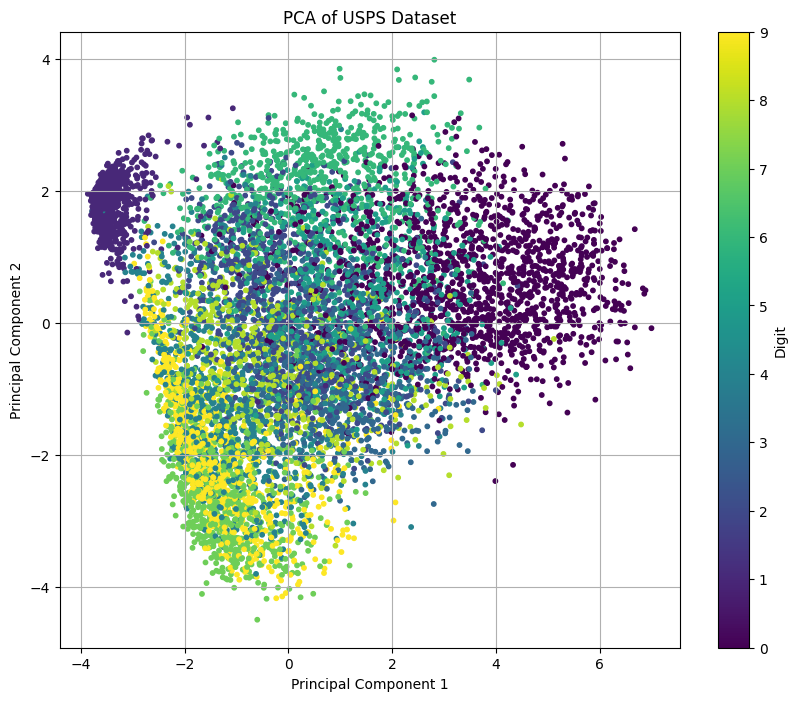

In [6]:
# Apply PCA
n_components = 2
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

# Print the shape of the reduced data
print("Shape of X after PCA:", X_pca.shape)

# Visualize the PCA result
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=10)
plt.title('PCA of USPS Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Digit')
plt.grid(True)
plt.show()

## UMAP

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Shape of X after UMAP (default n_neighbors): (9298, 2)


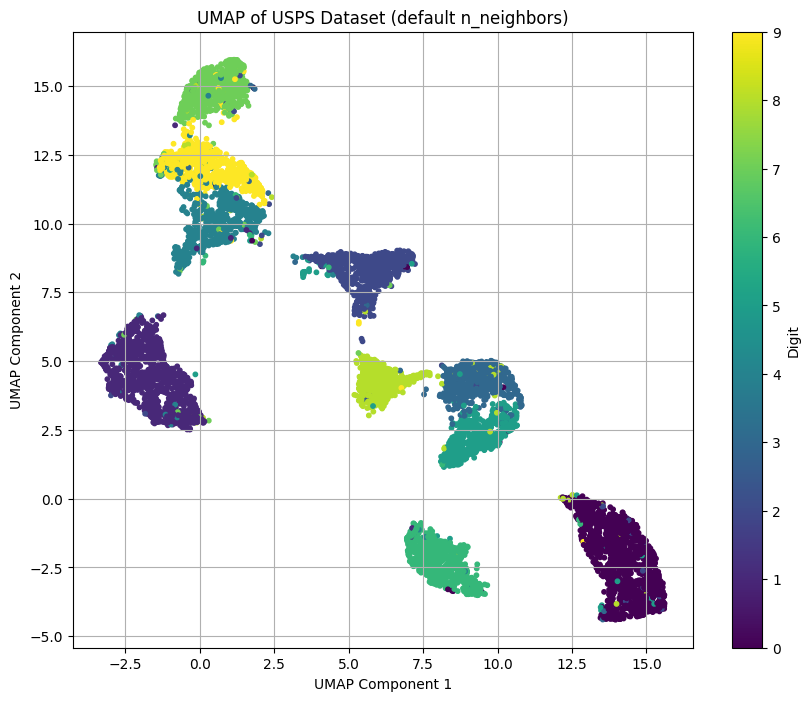

In [7]:
# Apply UMAP with default parameters
umap_reducer_default = umap.UMAP(random_state=42) # Use a random state for reproducibility
X_umap_default = umap_reducer_default.fit_transform(X)

# Print the shape of the reduced data
print("Shape of X after UMAP (default n_neighbors):", X_umap_default.shape)

# Visualize the UMAP result with default n_neighbors
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_umap_default[:, 0], X_umap_default[:, 1], c=y, cmap='viridis', s=10)
plt.title('UMAP of USPS Dataset (default n_neighbors)')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.colorbar(scatter, label='Digit')
plt.grid(True)
plt.show()

# Superposición de imágenes representativas

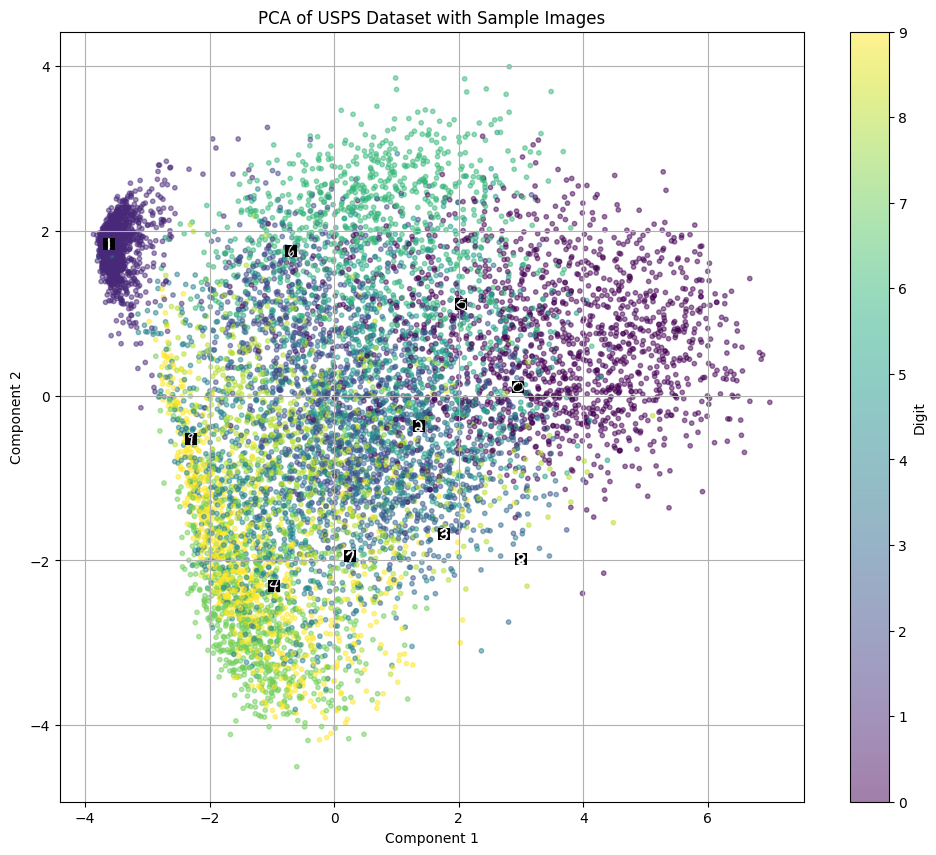

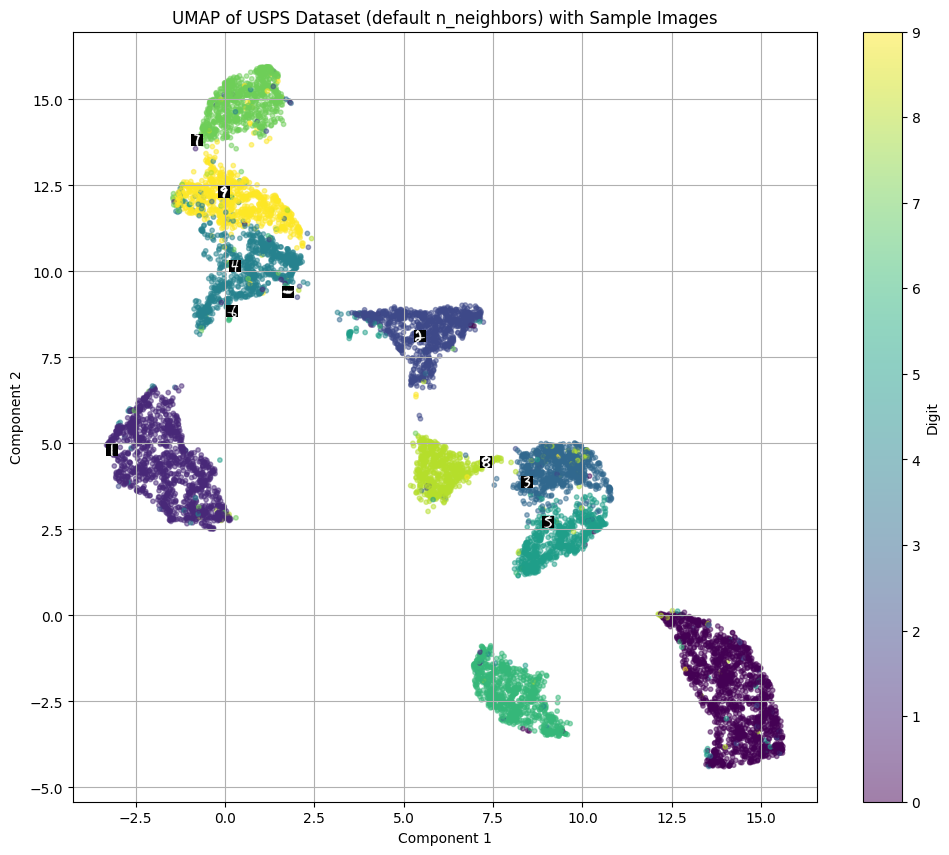

In [8]:
# Helper function to plot images on the scatter plot
def plot_scatter_with_images(X_2d, images, y, title, zoom=0.5):
    fig, ax = plt.subplots(figsize=(12, 10))
    scatter = ax.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap='viridis', s=10, alpha=0.5)
    ax.set_title(title)
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    fig.colorbar(scatter, label='Digit')
    ax.grid(True)

    # Select random images to annotate
    # To avoid plotting too many images and cluttering the plot,
    # we'll select a subset, perhaps one image per class.
    classes = np.unique(y)
    for digit in classes:
        # Find the indices of images belonging to the current digit
        indices = np.where(y == digit)[0]
        if len(indices) > 0:
            # Select a random index for this digit
            random_index = np.random.choice(indices)
            x, y_coord = X_2d[random_index]
            img = images[random_index].reshape(16, 16) # Reshape the flattened image

            # Create an OffsetImage
            im = OffsetImage(img, zoom=zoom, cmap='gray')
            ab = AnnotationBbox(im, (x, y_coord), xycoords='data', frameon=False)
            ax.add_artist(ab)

    plt.show()

# Reshape the original data X to image format (16x16)
# Assuming the original data X is flattened 16x16 images
images = X.reshape(-1, 16, 16)

# Plot images on the PCA result
plot_scatter_with_images(X_pca, images, y, 'PCA of USPS Dataset with Sample Images')

# Plot images on the UMAP result (default n_neighbors)
plot_scatter_with_images(X_umap_default, images, y, 'UMAP of USPS Dataset (default n_neighbors) with Sample Images')

## Explorando el impacto de `n_neighbors` en UMAP


Running UMAP with n_neighbors = 5


/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


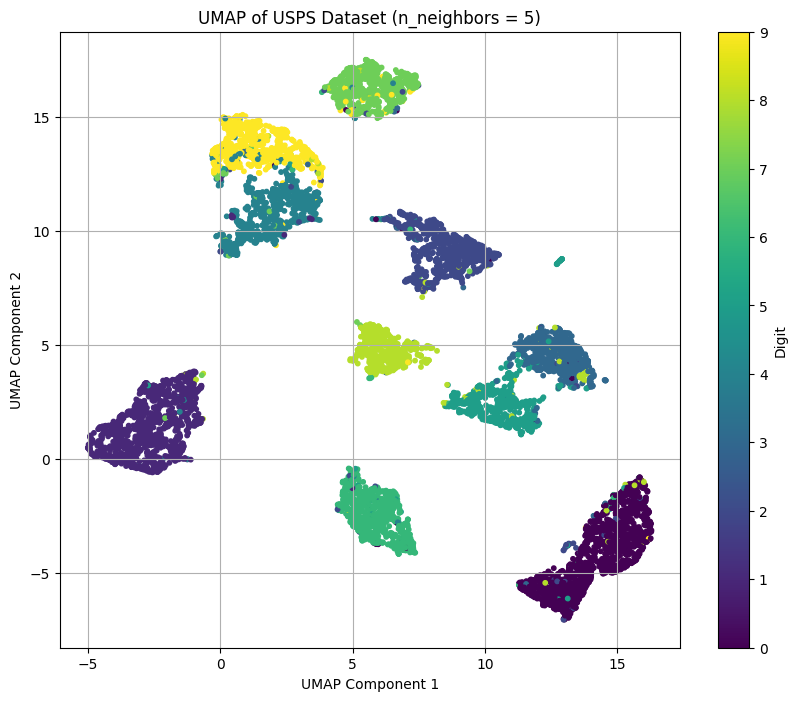


Running UMAP with n_neighbors = 15


/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


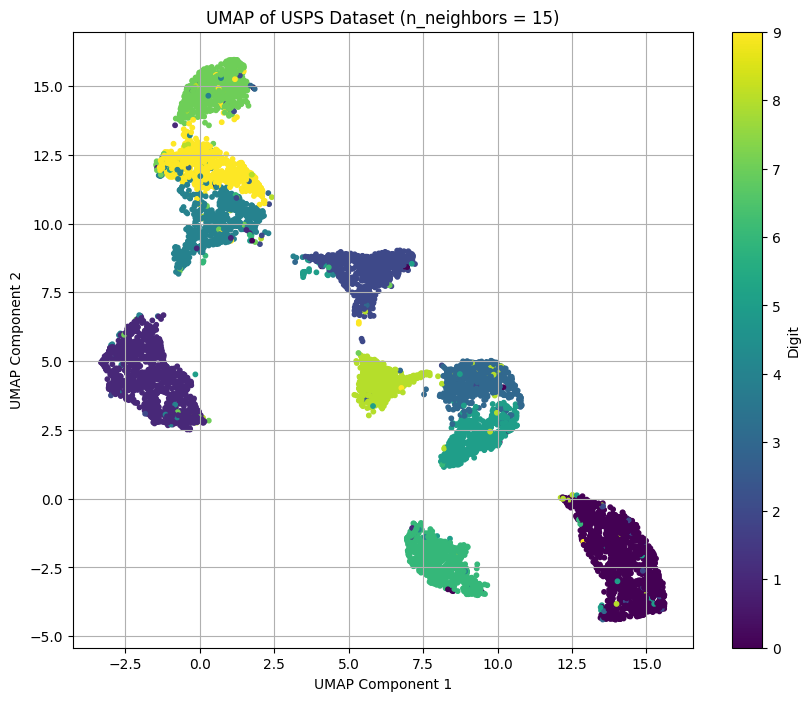


Running UMAP with n_neighbors = 50


/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


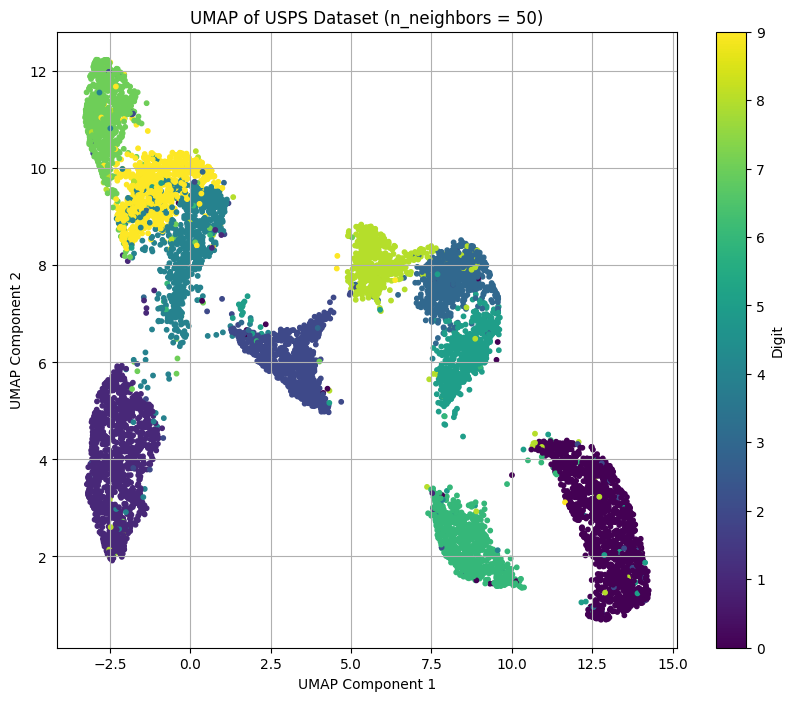


Running UMAP with n_neighbors = 100


/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


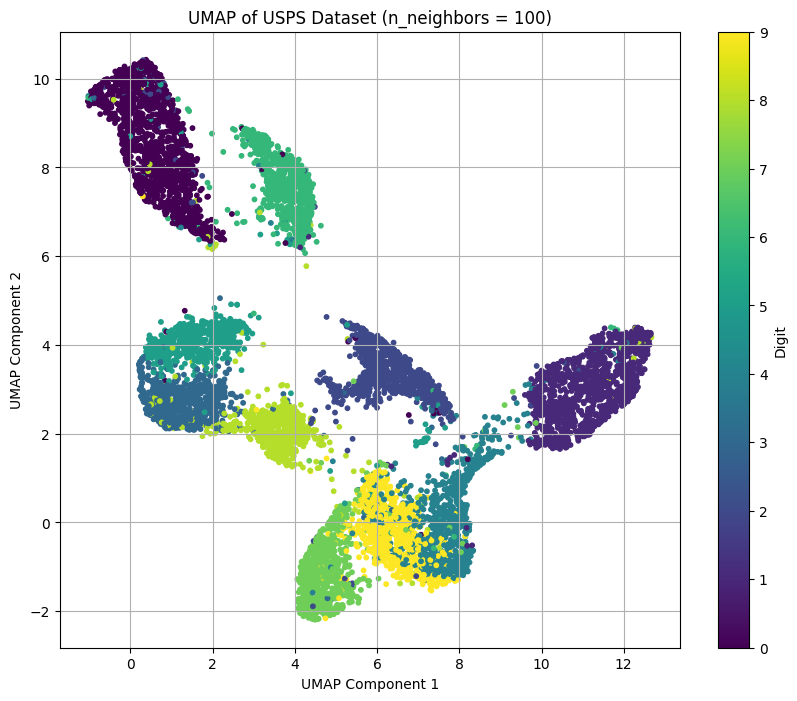

In [9]:
# Explore different values of n_neighbors for UMAP
n_neighbors_values = [5, 15, 50, 100]

for n_neighbors in n_neighbors_values:
    print(f"\nRunning UMAP with n_neighbors = {n_neighbors}")
    umap_reducer = umap.UMAP(n_neighbors=n_neighbors, random_state=42)
    X_umap = umap_reducer.fit_transform(X)

    # Visualize the UMAP result
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='viridis', s=10)
    plt.title(f'UMAP of USPS Dataset (n_neighbors = {n_neighbors})')
    plt.xlabel('UMAP Component 1')
    plt.ylabel('UMAP Component 2')
    plt.colorbar(scatter, label='Digit')
    plt.grid(True)
    plt.show()

# Análisis comparativo de los espacios latentes



# Conclusión y discusión

